# Deep Learning 2021
## Assignment 2 - Neural Networks and Loss Functions

### 1. Multilayer Perceptron

Consider an MLP with $n > 0$ hidden layers $h_1, h_2, ..., h_n$. Let all activation functions in this network be __linear__, e.g. all neurons use the identity $f(x) = x$ as the activation function. Show that there exists an equivalent MLP with no hidden layers (only input and output layer, resulting in the model being a **linear predictor**).

#### Solution
Assume the MLP with no hidden layers has the output $y_i = \sum^m_{j=1}w_{ij}*x_j$,
the MLP with n hidden layers and the linear activation function has the output $y_i = \sum_{j=1}^mw^{n-1}_{ji}*h_{ni}$, in which $w^{n-1}$ means the weight matrix of $n-1$ layer,
as we can see, the $n-1$ layer is $h_{n-1} = \sum_{j=1}^mw^{n-2}_{ji}*h_{n-1i}$,
and finally by adjust weightsto the sum of the weight matrix of all layers of the MLP with hidden layers we can find an equivalent MLP with no layers.

### 2. Loss Functions and Gradient Descent

Let $W = (a, b)$. Consider a linear model

\begin{equation*}
  f(x; W) = ax + b
\end{equation*}

and a training data set consisting of two data points $(x_0, y_0) = (1, 2)$ and $(x_1, y_1) = (2, 3)$. That is: ideally we want $f(1) = 2$ and $f(2) = 3$.

The model is randomly initialized to $a = 3, b = -1$. We want to train the model by minimizing the squared loss function using stochastic gradient descent (SGD) with learning rate $\eta = \frac{1}{10}$.

1. What are the ideal weights $a, b$ for this model?
2. Perform two steps of SGD. Use $(x_0, y_0)$ for the first step and $(x_1; y_1)$ for the second step. What are the gradients and updated weights after each step?
3. The gradient update in the first step might have been surprising to you. Can you point at a reason it came out this way, and does it tell you anything about potential shortcomings of SGD?
4. What would have been the gradient in a full gradient descent step?
5. Are stochastic gradient descent and gradient descent good choices to train this type of model or is there a better way?

#### Solution
1. $a = 1, b = 1$ 
2. first step: $W = [3, -1]$, $f(x_0, W) = 2 = y_0$, $gradient = 0$, $W$ keep constant,   
second step: $W = [3, -1]$,  $f(x_1, W) = 5$,  $gradinet_a = 2 * -(y_1 - (a*x_1 + b)) * x_1 = 2 * (5-3) * 2 = 8$,  $gradient_b = 2 * -(y_1 - (a*x_1 + b)) = 2 * (5-3) = 4$,  $W = W - \eta * gradient = [3, -1] - [0.8, 0.4] = [2.2, -1.4]$
3. it is just a coincidence, that the stochastic weight will have the same result as the weight we need, in generall simple linear combinition can usually have coincidences. In practice we usually need more complex linear combinition.
4. The partial derivative of the loss in respect to weights.   
5. mini-batch gradient descent.

### C0. Neural Networks from Scratch
Before working on the code assignments in this notebook, we recommend reading through the `What is torch.nn really?` tutorial notebook [link](https://pytorch.org/tutorials/beginner/nn_tutorial.html). You can also use [this link](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/5ddab57bb7482fbcc76722617dd47324/nn_tutorial.ipynb) to directly open it in Google Colab.


For this exercise, it is enough to work through the `Neural net from scratch (no torch.nn)` section. The `Refactor using ...` sections will be important for the next exercise (Assignment 4).


### C1. Learning XOR
The XOR function is defined as
\begin{equation}
    x_1 \oplus x_2 =
    \begin{cases}
        0 \quad x_1 = x_2\\
        1 \quad x_1 \neq x_2\\
    \end{cases}.
\end{equation}

In this task we want to use [`scikit-learn`](https://scikit-learn.org/stable/index.html) to train a linear model on the XOR function.

1. What are the possible input-output-pairs $(x, y)$?
2. Use [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) to train a linear classifier on all pairs from 1.
3. Test your model. Is it working well? Why (not)?

In [163]:
import torch
from matplotlib import pyplot as plt

# ToDo: define input-output pairs
X = torch.tensor([[0, 0], [0, 1], [1, 1], [1, 0], [0, 0], [1, 0], [0, 1], [1, 1]])
y = torch.tensor([[1], [0], [1], [0], [1], [0], [0], [1]])

from sklearn.linear_model import LinearRegression
# ToDo: Fit a linear regression
X_train = X[0: 6]
X_test = X[6: ]
y_train = y[0: 6]
y_test = y[6: ]

linreg = LinearRegression()
linreg.fit(X_train, y_train)

# ToDo: Make predicitons and test/visualize the linear regression model

y_pred = linreg.predict(X_test)
n = y_pred.size

error = 0
for i in range(n):
    error = error + (y_test[i] - y_pred[i]) ** 2
error = error / n
print("Error is %.4f" % error)

Error is 0.4444


3. Not very well, because my train dataset is too small.

### C2. Learning XOR with MLP
We want to implement a simple feed-forward net that can learn the XOR function. Our network should have a single $5$-dimensional hidden layer $h$ and use sigmoid activation in all layers.

1. What are the dimensions of the two weight matrices?
2. Implement the forward pass. Initialize the weight matrices randomly in $[-1; 1]$. You can omit the bias terms in this example.
3. Implement a backward pass that computes the gradients of the weights w.r.t. the loss. 
4. Implement the training loop over the dataset consisting of: 
    * a forward pass, computing the output of the net.
    * computing the loss.
    * a backward pass, computing the gradients of the weights w.r.t. the loss.
    * updating the weights
    
    Use plain SGD optimization and squared error $SE(y, \hat{y}) = \frac{1}{2} (y - \hat{y})^2$ as the objective funciton (loss). Set the learning rate to $\eta = 1$.
4. Train the model by running the training loop for 1001 epochs. Afterwards, test your model by printing its predictions on the dataset.

For this task, use only basic tensor features of **PyTorch**. Specifically, do **not** use 
* autograd , e.g. `.backward()`
* `torch.nn`
* `torch.optim`
* the built-in sigmoid function (implement it yourself)
* or similar off-the-shelf building blocks

1. size of the first weight matrix is 2 * 5, of the second is 5 * 1

loss is 0.2711


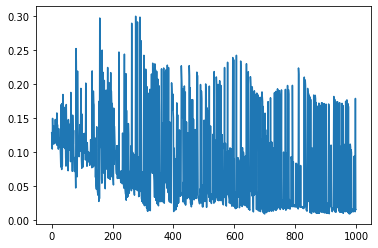

In [2]:
import torch
from matplotlib import pyplot as plt

# ToDo
X = torch.tensor([[0., 0.], [0., 1.], [1., 1.], [1., 0.], [0., 0.], [1., 0.], [0., 1.], [1., 1.]])
Y = torch.tensor([[1.], [0.], [1.], [0.], [1.], [0.], [0.], [1.]])

X_train = X[0: 6]
X_test = X[6: ]
Y_train = Y[0: 6]
Y_test = Y[6: ]

def sigmoid(h):
    return 1. / (1. + torch.exp(-h))

def sigmoid_der(h):
    return sigmoid(h) * (1. - sigmoid(h))

loss_log = torch.zeros(1001)

W1 = torch.rand(2, 5) * 2 - 1
W2 = torch.rand(5, 1) * 2 - 1

for epoch in range(1001):
    
    index = torch.randint(len(X_train), [1, 1])[0][0]
    x = X_train[index]
    y = Y_train[index]
    
    #forward
    h_for = torch.matmul(x, W1) #before activation function
    h = sigmoid(h_for)
    y_pred_for = torch.matmul(h, W2)
    y_pred = sigmoid(y_pred_for)
    
    #computing loss
    loss = 0.5 * (y - y_pred) ** 2
    #print("in %d epoch loss is %.4f" % (epoch, loss))
    loss_log[epoch] = loss
    
    #backward
    gradient_W2 = torch.zeros(5, 1)
    for item in range(5):
        gradient_W2[item] = -(y - y_pred) * sigmoid_der(y_pred_for) * h[item]
    
    gradient_W1 = torch.zeros(2, 5)
    for i in range(2):
        for j in range(5):
            gradient_W1[i, j] = -(y - y_pred) * sigmoid_der(y_pred_for) * W2[j] * sigmoid_der(h_for[j]) * x[i]
    
    W1 = W1 - gradient_W1
    W2 = W2 - gradient_W2
    
loss_eva = 0
y_eva = torch.zeros(1, 2)[0]
for i in range(2):
    y_eva[i] = sigmoid(torch.matmul(sigmoid(torch.matmul(X_test[i], W1)), W2))
    loss_eva = loss_eva + 0.5 * (Y_test[i] - y_eva[i]) ** 2

print("loss is %.4f" % loss_eva)

plt.plot(loss_log)
plt.show()
    